In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('WHO-COVID-19-global-data.csv')
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
285106,2023-04-15,ZW,Zimbabwe,AFRO,10,264607,0,5684
285107,2023-04-16,ZW,Zimbabwe,AFRO,3,264610,0,5684
285108,2023-04-17,ZW,Zimbabwe,AFRO,3,264613,0,5684
285109,2023-04-18,ZW,Zimbabwe,AFRO,0,264613,0,5684


In [76]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.851110e+05,2.851110e+05,285111.000000,2.851110e+05
mean,2.678747e+03,1.239015e+06,24.231103,1.655850e+04
std,3.916725e+04,5.811441e+06,145.037737,7.103328e+04
min,-8.261000e+03,0.000000e+00,-3520.000000,0.000000e+00
25%,0.000000e+00,1.450000e+03,0.000000,1.300000e+01
50%,1.100000e+01,2.876000e+04,0.000000,3.160000e+02
75%,3.560000e+02,3.380990e+05,4.000000,4.965000e+03
max,6.966046e+06,1.029774e+08,11447.000000,1.120529e+06


In [77]:
df.shape

(285111, 8)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285111 entries, 0 to 285110
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      285111 non-null  object
 1   Country_code       283908 non-null  object
 2   Country            285111 non-null  object
 3   WHO_region         285111 non-null  object
 4   New_cases          285111 non-null  int64 
 5   Cumulative_cases   285111 non-null  int64 
 6   New_deaths         285111 non-null  int64 
 7   Cumulative_deaths  285111 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 17.4+ MB


In [79]:
# date = df['Date_reported']

# Convert 'Date' column to datetime format
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# Group by 'Date' and sum the 'New Cases'
cases_by_date = df.groupby('Date_reported')['New_cases'].sum().to_dict()

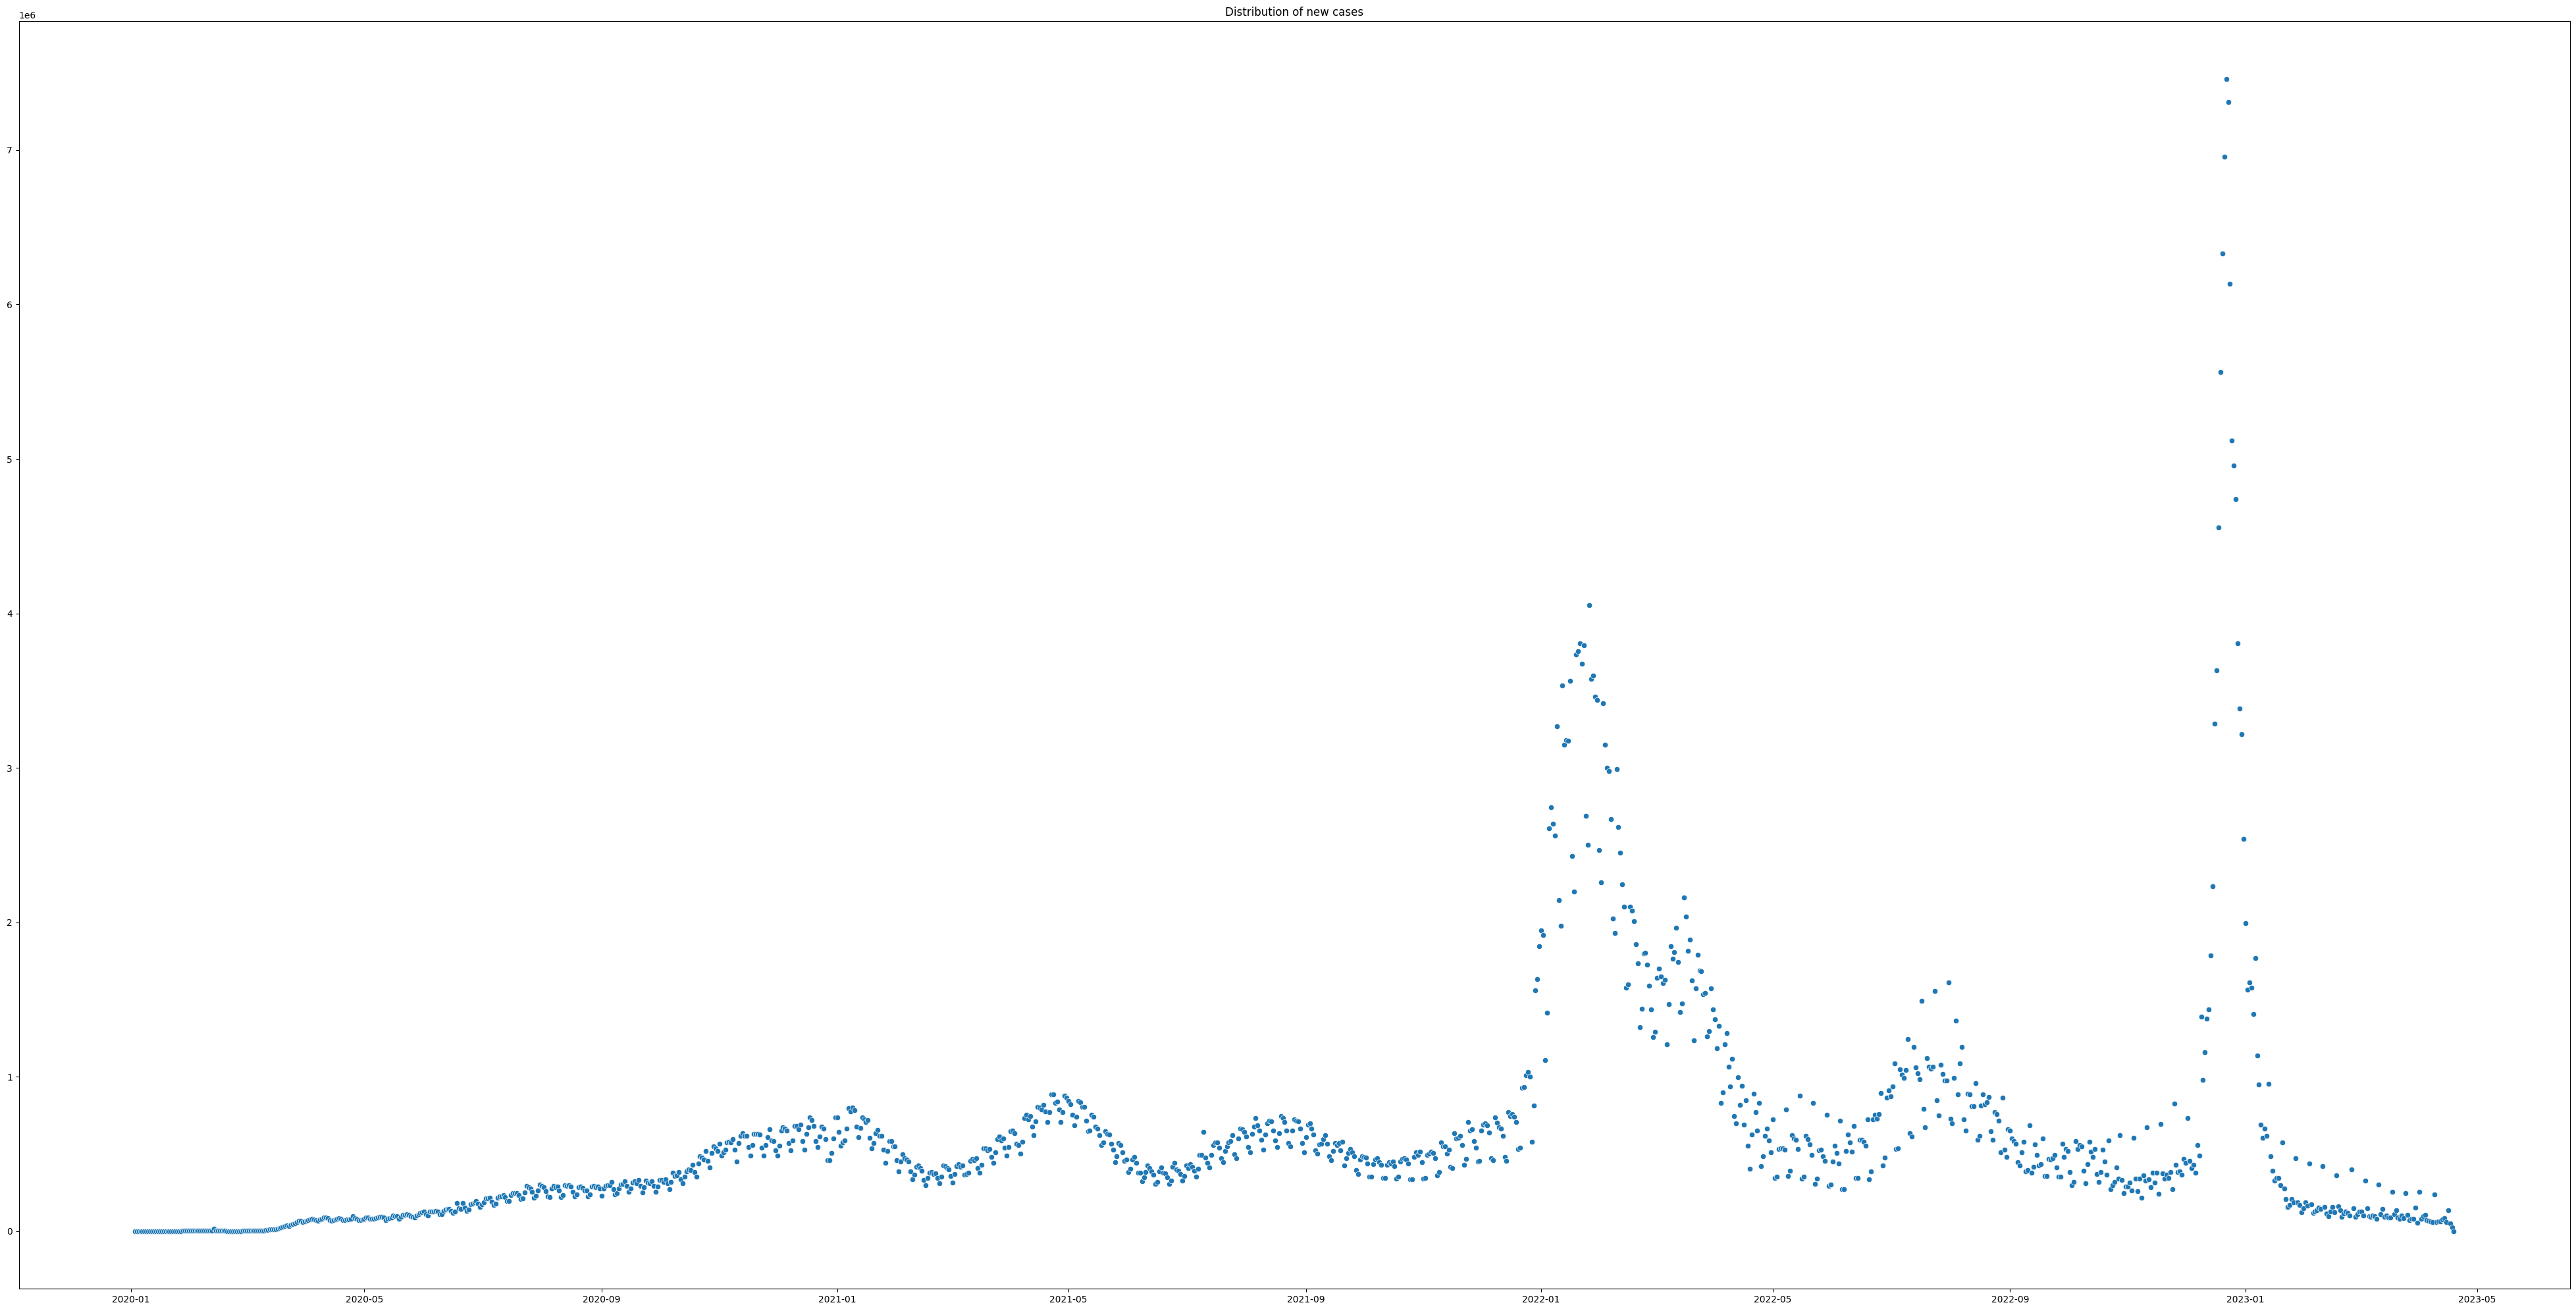

In [80]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(50, 25))

sns.scatterplot(x = cases_by_date.keys(), y = cases_by_date.values())

ax.set_title(f"Distribution of new cases")
plt.show()

In [81]:
count_cases_in_countries = df.groupby('Country_code')['New_cases'].sum().to_dict()
count_cases_in_countries.pop(' ')

764

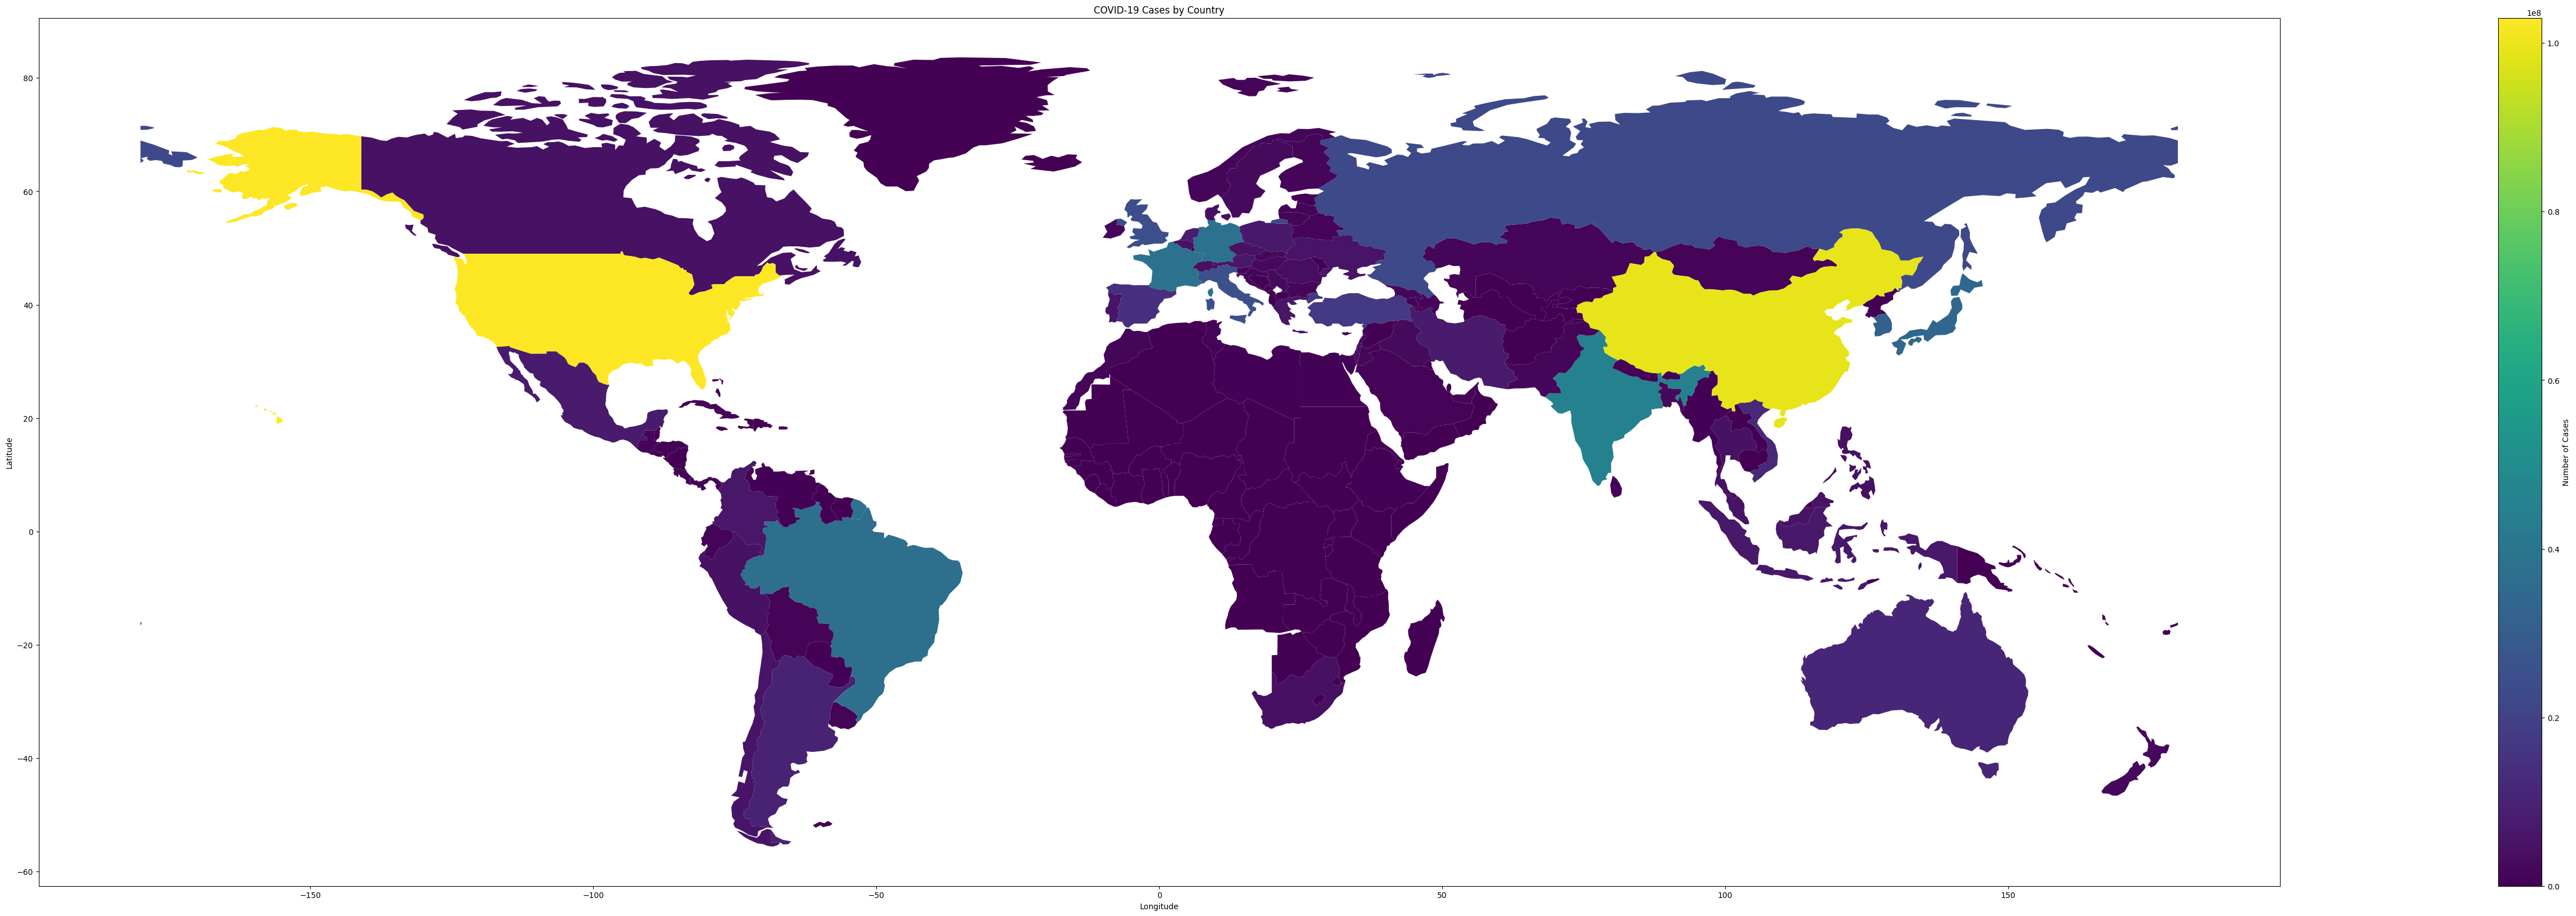

In [82]:
import geopandas as gpd
import pycountry

# Create a dictionary mapping ISO country codes to two-letter codes
iso_to_alpha2 = {c.alpha_3: c.alpha_2 for c in pycountry.countries}

# Load world map shapefile
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the iso_a3 column to two-letter codes
world_map['iso_a2'] = world_map['iso_a3'].map(iso_to_alpha2)

# Merge country names and numbers with world map data
world_map['country_code'] = world_map['iso_a2'].map(count_cases_in_countries)

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(100, 20))

# Plot the map with cartogram
world_map.plot(column='country_code', ax=ax, legend=True, legend_kwds={'label': 'Number of Cases'})

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('COVID-19 Cases by Country')

# Display the map
plt.show()